<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/30
391/391 - 38s - loss: 1.6809 - accuracy: 0.3797 - val_loss: 1.3477 - val_accuracy: 0.5091 - 38s/epoch - 96ms/step
Epoch 2/30
391/391 - 7s - loss: 1.3154 - accuracy: 0.5270 - val_loss: 1.1509 - val_accuracy: 0.5930 - 7s/epoch - 17ms/step
Epoch 3/30
391/391 - 7s - loss: 1.1313 - accuracy: 0.5970 - val_loss: 0.9996 - val_accuracy: 0.6469 - 7s/epoch - 17ms/step
Epoch 4/30
391/391 - 7s - loss: 1.0157 - accuracy: 0.6417 - val_loss: 0.9062 - val_accuracy: 0.6829 - 7s/epoch - 17ms/step
Epoch 5/30
391/391 - 7s - loss: 0.9357 - accuracy: 0.6703 - val_loss: 0.8258 - val_accuracy: 0.7106 - 7s/epoch - 18ms/step
Epoch 6/30
391/391 - 7s - loss: 0.8715 - accuracy: 0.6930 - val_loss: 0.7768 - val_accuracy: 0.7313 - 7s/epoch - 17ms/step
Epoch 7/30
391/391 - 7s - loss: 0.8101 - accuracy: 0.7147 - val_loss: 0.7466 - val_accuracy: 0.7432 - 7s/epoch - 17ms/step
Epoch 8/30
391/391 - 7s - loss: 0.7711 - accuracy: 0.7298 - val_loss: 

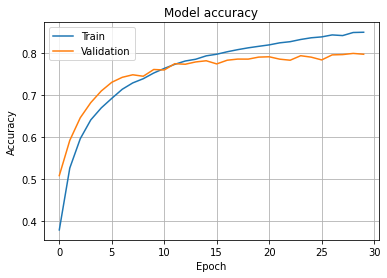

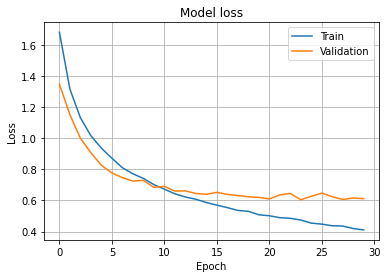

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Mounted at /content/gdrive


In [ ]:
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"
cnn.save(dir+"cnn_cifar10.h5")
print("Saved model to disk.")

Saved model to disk.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.python.keras.models import load_model

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn = load_model(dir + "cnn_cifar10.h5")
cnn.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

170508288/170498071 [==============================] - 11s 0us/step
Epoch 1/30
391/391 - 164s - loss: 1.6130 - accuracy: 0.4062 - val_loss: 1.3233 - val_accuracy: 0.5240 - 164s/epoch - 420ms/step
Epoch 2/30
391/391 - 163s - loss: 1.2327 - accuracy: 0.5570 - val_loss: 1.0910 - val_accuracy: 0.6069 - 163s/epoch - 416ms/step
Epoch 3/30
391/391 - 162s - loss: 1.0713 - accuracy: 0.6206 - val_loss: 0.9997 - val_accuracy: 0.6461 - 162s/epoch - 414ms/step
Epoch 4/30


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/30
391/391 - 162s - loss: 1.6736 - accuracy: 0.3830 - val_loss: 1.3122 - val_accuracy: 0.5168 - 162s/epoch - 414ms/step
Epoch 2/30
391/391 - 164s - loss: 1.2723 - accuracy: 0.5433 - val_loss: 1.0733 - val_accuracy: 0.6160 - 164s/epoch - 418ms/step
Epoch 3/30
391/391 - 164s - loss: 1.0990 - accuracy: 0.6101 - val_loss: 0.9755 - val_accuracy: 0.6555 - 164s/epoch - 420ms/step
Epoch 4/30
391/391 - 164s - loss: 0.9815 - accuracy: 0.6562 - val_loss: 0.9446 - val_accuracy: 0.6671 - 164s/epoch - 420ms/step
Epoch 5/30
391/391 - 165s - loss: 0.9045 - accuracy: 0.6823 - val_loss: 0.8448 - val_accuracy: 0.7078 - 165s/epoch - 421ms/step
Epoch 6/30
391/391 - 164s - loss: 0.8455 - accuracy: 0.7043 - val_loss: 0.7826 - val_accuracy: 0.7280 - 164s/epoch - 420ms/step
Epoch 7/30
391/391 - 165s - loss: 0.7957 - accuracy: 0.7214 - val_loss: 0.7461 - val_accuracy: 0.7429 - 165s/epoch - 422ms/step
Epoch 8/30
391/391 - 168s - loss: 0.7